In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 岭回归手动实现（解析解）

In [2]:
#岭回归
def load_data():
    data=pd.read_table('./data/data_ridge.txt',sep='	',names=['x1','y'])
    data['x0']=1
    feature=data[['x0','x1']] #X
    label=data['y']           #Y
    return np.mat(feature), np.mat(label).T

def ridge_regression(feature, label, lam):
    n = np.shape(feature)[1]
    theta = (feature.T * feature + lam * np.mat(np.eye(n))).I * feature.T * label      # 解析解
    return theta

Text(0.5, 1.0, 'ridge_regression')

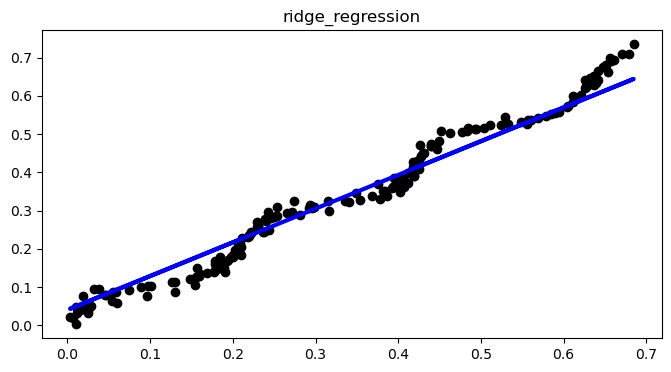

In [8]:
# 导入数据并绘制散点图
feature, label = load_data()
plt.figure(figsize=(8,4),dpi=100)
feature1= feature[:,1].getA()
label1= label.getA() #从矩阵里面取数组
plt.scatter(feature1,label1,color='black')

# 训练模型
theta = ridge_regression(feature, label, 1)  # lam参数,可以调整
y_fit= feature * theta

# 画图
plt.plot(feature1,y_fit,color = 'blue', linewidth=3)
plt.title("ridge_regression")

# sklearn中的岭回归

##### 使用abalone鲍鱼数据集
性别（M，F，I）由于鲍鱼年幼时分辨不出该属性，所以有三个类别。  
长度 单位毫米  
直径 单位毫米  
高度 单位毫米  
总重量  
剥壳重量  
内脏重量  
壳重  
环的数量 （标签，整型 +1.5用于预测鲍鱼年龄）

In [9]:
# 读入数据
data_raw= pd.read_csv(r'./data/abalone.txt',sep='	') 

# 数据标准化
from sklearn.preprocessing import StandardScaler
data_standard= StandardScaler().fit_transform(data_raw)  # 实例化后直接fit

# 生成训练数据
data= pd.DataFrame(data_standard, columns= ['x1','x2','x3','x4','x5','x6','x7','x8','y'])
X, y= data.iloc[:, :-1], data.iloc[:, -1]

## 岭回归（L2正则）

In [16]:
# 训练模型
from sklearn import linear_model
reg = linear_model.Ridge(alpha= 10).fit(X, y) 

# MSE
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(y, reg.predict(X)))

# R方
print("R方: ", reg.score(X, y))

MSE:  0.47290000759844547
R方:  0.5270999924015545


## Lasso回归（L1正则）

In [17]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1).fit(X, y) 

print("MSE: ", mean_squared_error(y, reg_lasso.predict(X)))

# R方
print("R方: ", reg_lasso.score(X, y))

MSE:  0.6105338586965563
R方:  0.3894661413034437


## 弹性网络（L1+L2正则）

In [35]:
from sklearn.linear_model import ElasticNet
reg_elastic = ElasticNet(alpha=0.5, l1_ratio=0.1).fit(X, y)  #只需要优化alpha和l1_ratio

In [36]:
print("MSE: ", mean_squared_error(y, reg_elastic.predict(X)))

# R方
print("R方: ", reg_elastic.score(X, y))

MSE:  0.632555566243067
R方:  0.36744443375693303
